# Лабораторная работа №1 

### Выполнили: 
* Иванов Александр Константинович, 368220 
* Братушка Никита Игоревич, 367924

In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot, heatmap
from sklearn.preprocessing import StandardScaler

# Датасет 1. Advertising

## Первичный статистический анализ данных 

In [102]:
# загрузка датасета 
data = pd.read_csv('Advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [103]:
# количество нулевых значений
print(data.isnull().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
Skewness: 
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64
Kurtosis: 
TV          -1.226495
radio       -1.260401
newspaper    0.649502
sales       -0.408869
dtype: float64


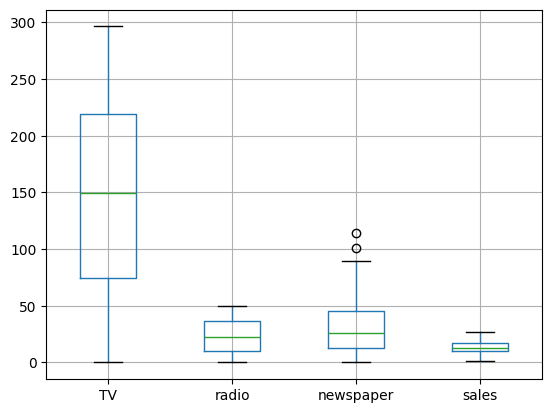

In [104]:
# меры центральной тенденции для каждого признака
print(data.describe())


# скос и эксцесс
print("Skewness: ")
print(data.skew())
print("Kurtosis: ")
print(data.kurtosis())

data.boxplot()
plt.show()

### Гистограммы признаков 

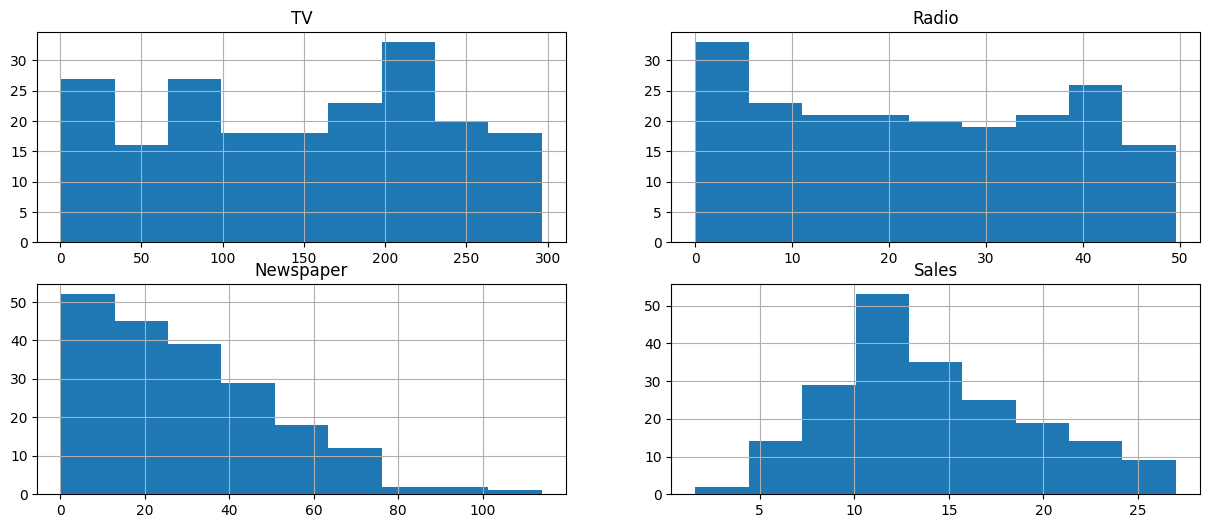

In [105]:
plt.figure(figsize=(15, 6))

num_bins = 9
dens = False 

# диаграммы признаков
plt.subplot(2, 2, 1)
plt.grid()
plt.hist(data['TV'], bins=num_bins, density=dens)
plt.title('TV')

plt.subplot(2, 2, 2)
plt.grid()
plt.hist(data['radio'], bins=num_bins, density=dens)
plt.title('Radio')

plt.subplot(2, 2, 3)
plt.grid()
plt.hist(data['newspaper'], bins=num_bins, density=dens)
plt.title('Newspaper')

plt.subplot(2, 2, 4)
plt.grid()
plt.hist(data['sales'], bins=num_bins, density=dens)
plt.title('Sales')

plt.show()


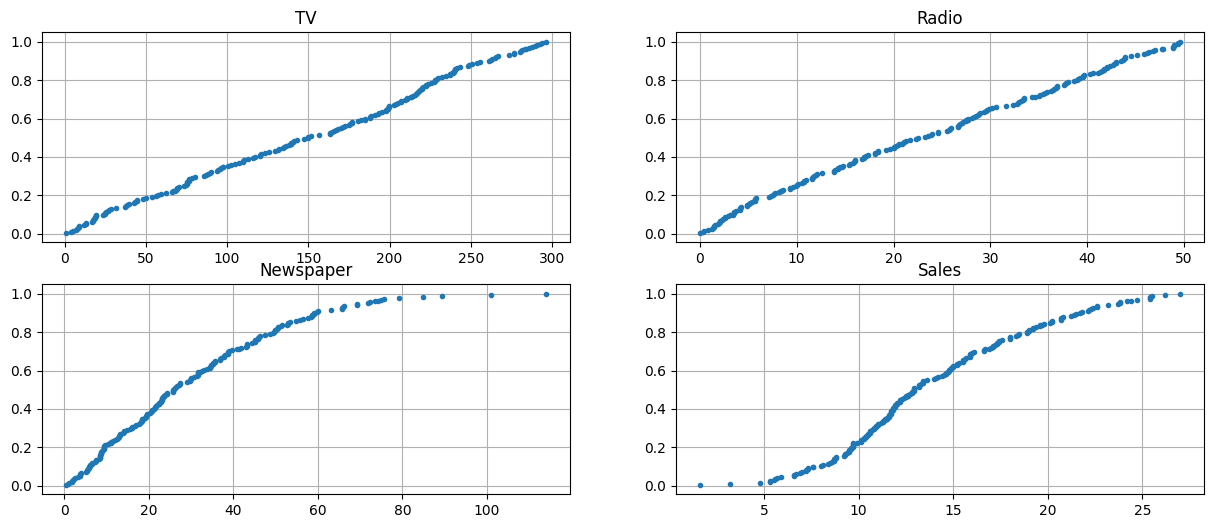

In [106]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.grid()
x, y = ecdf(data['TV'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('TV')

plt.subplot(2, 2, 2)
plt.grid()
x, y = ecdf(data['radio'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Radio')

plt.subplot(2, 2, 3)
plt.grid()
x, y = ecdf(data['newspaper'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Newspaper')

plt.subplot(2, 2, 4)
plt.grid()
x, y = ecdf(data['sales'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Sales')

plt.show()

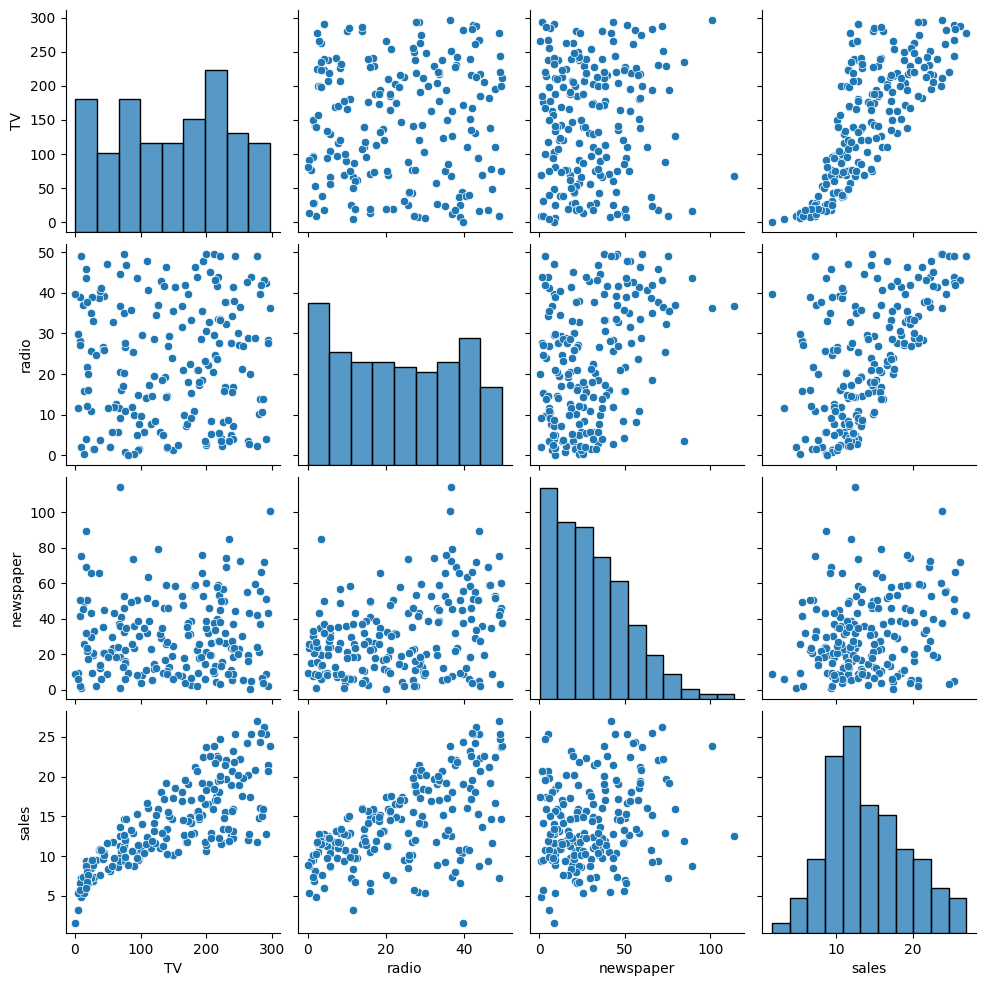

In [107]:
pairplot(data)
plt.show()

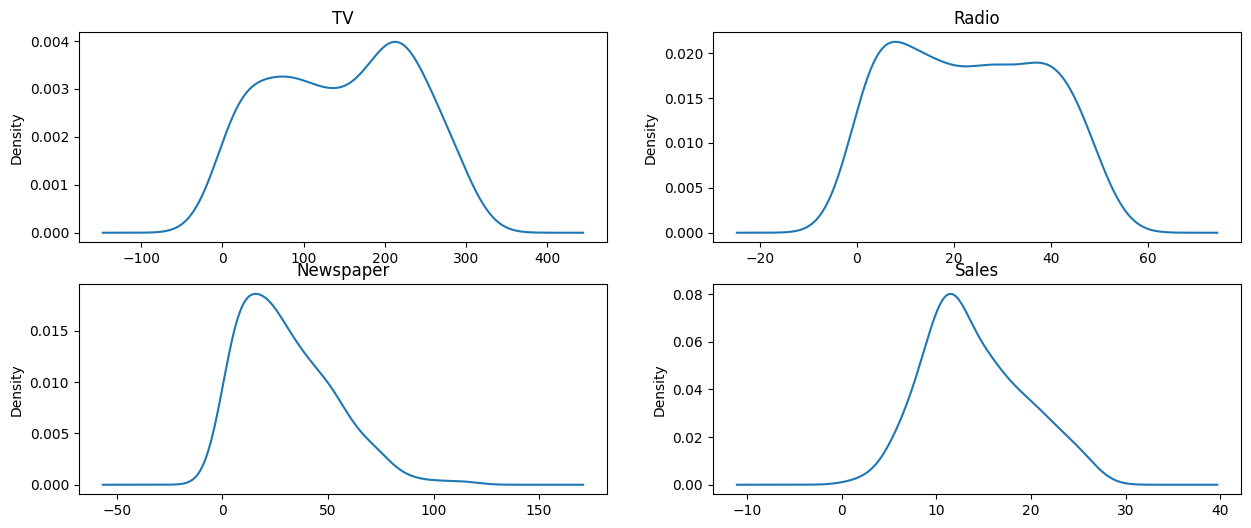

In [108]:
# kde 

plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.grid()
data['TV'].plot.kde()
plt.title('TV')

plt.subplot(2, 2, 2)
plt.grid()
data['radio'].plot.kde()
plt.title('Radio')

plt.subplot(2, 2, 3)
plt.grid()
data['newspaper'].plot.kde()
plt.title('Newspaper')

plt.subplot(2, 2, 4)
plt.grid()
data['sales'].plot.kde()
plt.title('Sales')

plt.show()

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


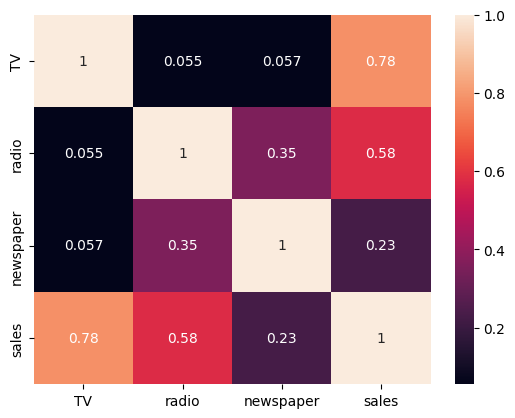

In [109]:
# correlation matrix
print(data.corr())

heatmap(data.corr(), annot=True)
plt.show()





### Обработка признаков 

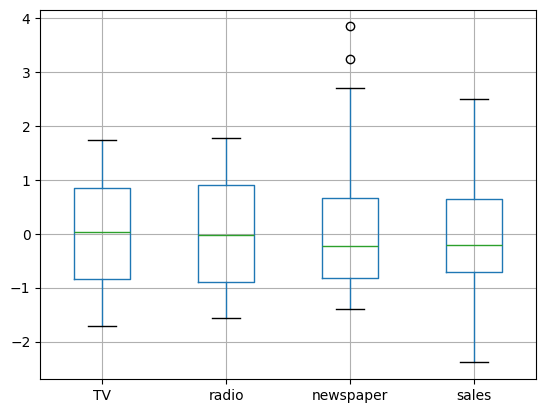

In [111]:
# приведем признаки к одному масштабу
scaler = StandardScaler() # z-score normalization
data[['TV', 'radio', 'newspaper', 'sales']] = scaler.fit_transform(data[['TV', 'radio', 'newspaper', 'sales']])

data.boxplot() 
plt.show()